In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

mpl.rcParams["figure.dpi"] = 150
sns.set_style("whitegrid")
sns.set_palette("deep")

Uma EDA interessante a se fazer para decidir sobre quais variáveis adicionar ao dataset é mergear orders_and_products com clients of the training or test data. E analisar a feature de churn.

In [3]:
# data
orders_and_product_df = pd.read_csv("../data/orders_products_merge.csv", parse_dates=["datetime"])
client_tr = pd.read_csv("../data/client.train.csv", parse_dates=["birthdate"])

In [4]:
orders_and_product_df.value_counts(["source"])

source
sc08      97796
sc12      35398
sc11      10692
sc04       8110
sc09       7489
sc05       4596
sc10       1263
sc14       1262
sc07        700
sc01        483
sc06        313
sc02        182
sc15         62
sc16         55
sc03         53
sc13         18
dtype: int64

In [5]:
or_pr_cl_df_ = orders_and_product_df.merge(
    right=client_tr[["client_id", "is_churn"]],
    how="left",
    on="client_id"
)

or_pr_cl_df = or_pr_cl_df_[~or_pr_cl_df_["is_churn"].isnull()]

In [6]:
or_pr_cl_df["order_year"] = or_pr_cl_df["datetime"].dt.year
or_pr_cl_df["order_month"] = or_pr_cl_df["datetime"].dt.month

/tmp/ipykernel_270003/928556892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  or_pr_cl_df["order_year"] = or_pr_cl_df["datetime"].dt.year
/tmp/ipykernel_270003/928556892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  or_pr_cl_df["order_month"] = or_pr_cl_df["datetime"].dt.month


In [7]:
or_pr_cl_df["order_day"] = or_pr_cl_df["datetime"].dt.day

/tmp/ipykernel_270003/3303079241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  or_pr_cl_df["order_day"] = or_pr_cl_df["datetime"].dt.day


In [8]:
# vamos pegar até uma semana anterior ao feriado
# ta no mês? yes
# ta no dia? no
# ta na semana anterior? yes
# TODO: criar função para verificar data.

In [9]:
import holidays

In [10]:
for date, name in sorted(holidays.BR(years=2019).items()):
    print(date, name)

2019-01-01 Ano novo
2019-03-05 Carnaval
2019-03-06 Quarta-feira de cinzas (Início da Quaresma)
2019-04-19 Sexta-feira Santa
2019-04-21 Páscoa, Tiradentes
2019-05-01 Dia Mundial do Trabalho
2019-06-20 Corpus Christi
2019-09-07 Independência do Brasil
2019-10-12 Nossa Senhora Aparecida
2019-11-02 Finados
2019-11-15 Proclamação da República
2019-12-25 Natal


Vamos criar uma feature chamada, is_holyday month. Essa feature vai indicar se a data que foi setada a operação foi feriado ou não.

In [11]:
states = ["AC", "AL", "AM", "AP", "BA", "CE", "DF", "ES", "GO", "MA", "MG", "MS", "MT", "PA", "PB", "PE", "PI", "RJ", "RN", "RO", "RR", "RS", "SC", "SE", "SP", "TO"]

holiday_df = pd.DataFrame()

for state in states:
    date_list = []
    holiday_list = []
    for date, name in sorted(holidays.BR(state=state, years=2022).items()):
        date_list.append(date)
        holiday_list.append(name)
        df = pd.DataFrame({"date": date_list, "holidays": holiday_list})
        holiday_df = pd.concat([holiday_df, df], axis=0)

unique_holidays_date = holiday_df.drop_duplicates(["date"])


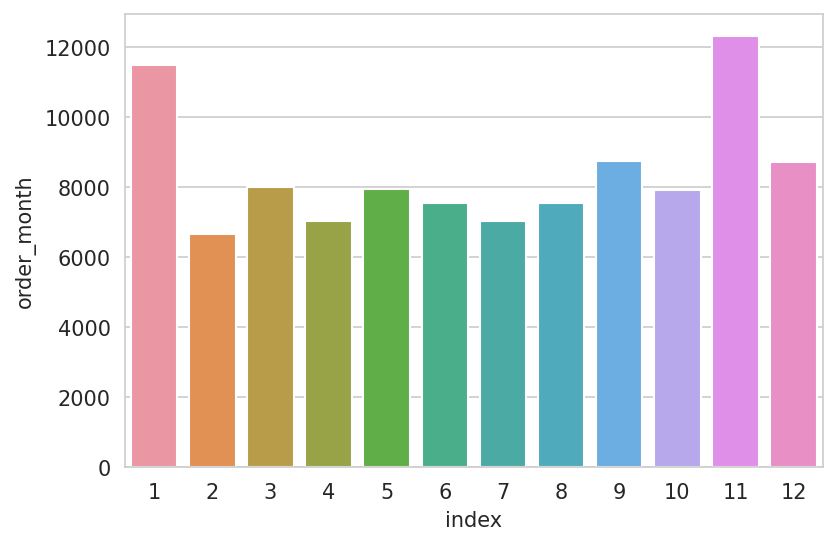

In [12]:
df = or_pr_cl_df['order_month'].value_counts().reset_index()

_ = sns.barplot(x="index", y="order_month", data=df)

2019-01-01 Ano novo
2019-03-05 Carnaval
2019-03-06 Quarta-feira de cinzas (Início da Quaresma)
2019-04-19 Sexta-feira Santa
2019-04-21 Páscoa, Tiradentes
2019-05-01 Dia Mundial do Trabalho
2019-06-20 Corpus Christi
2019-09-07 Independência do Brasil
2019-10-12 Nossa Senhora Aparecida
2019-11-02 Finados
2019-11-15 Proclamação da República
2019-12-25 Natal


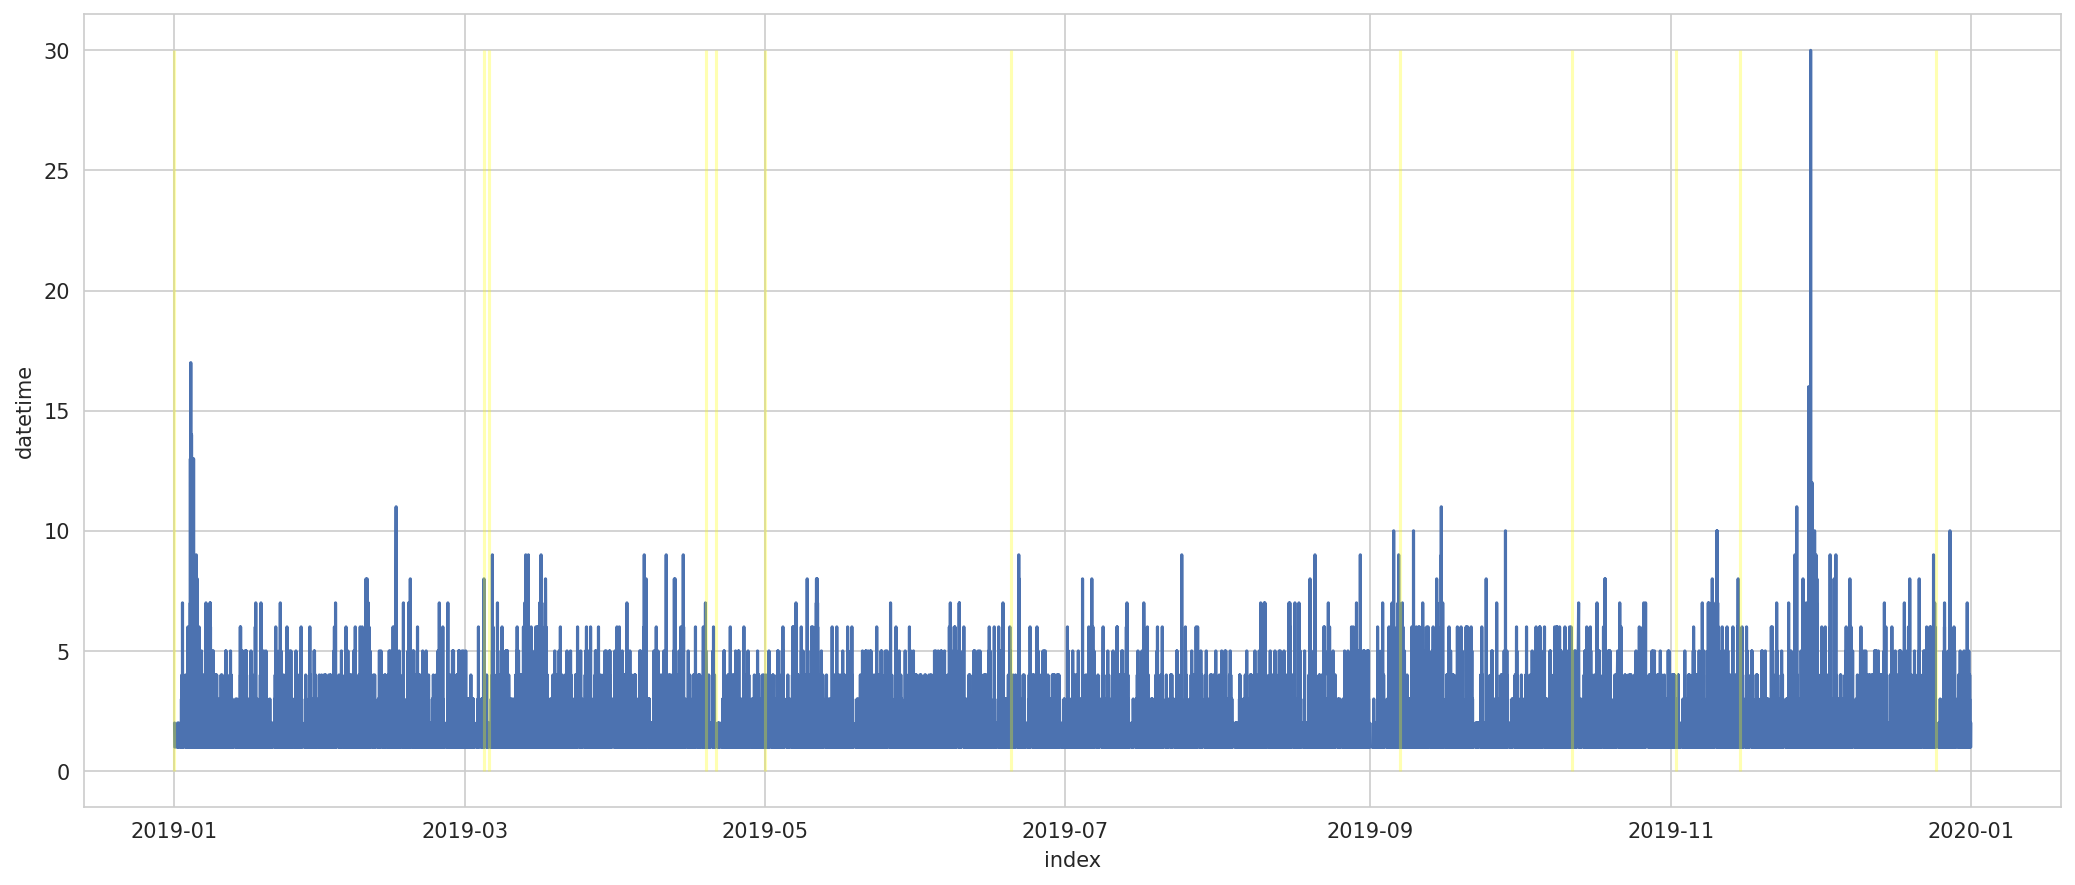

In [13]:
holiday_dates = []
for date, name in sorted(holidays.BR(years=2019).items()):
    holiday_dates.append(date)
    print(date, name)

fig_dim = (17, 7)

fig, ax = plt.subplots(figsize=fig_dim)

df = or_pr_cl_df["datetime"].value_counts().reset_index()

_ = sns.lineplot(x="index", y="datetime", data=df)

for date in holiday_dates:
    plt.vlines(x=date, ymin=0, ymax=30, colors="yellow", alpha=.3)

plt.show()

In [14]:
or_pr_cl_df

,order_id,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,...,source,category_lv0,category_lv1,category_lv2,category_lv3,category_lv4,is_churn,order_year,order_month,order_day
0,ox008433,cx05072,px04611,2019-10-07 15:20:00,1.0,49.90,pm05,NaN,NaN,st07,...,sc08,mk04,mk04:128,mk04:128:103,mk04:128:103:103,mk04:128:103:103:03294,False,2019,10,7
1,ox070389,cx05072,px12305,2019-10-11 17:42:00,1.0,69.90,pm05,NaN,NaN,st07,...,sc08,mk04,mk04:292,mk04:292:246,mk04:292:246:103,mk04:292:246:103:04338,False,2019,10,11
12,ox090390,cx03836,px11147,2019-02-08 11:37:00,1.0,54.92,pm05,NaN,NaN,st07,...,sc08,mk29,mk29:039,mk29:039:103,mk29:039:103:103,mk29:039:103:103:06602,False,2019,2,8
13,ox090390,cx03836,px11147,2019-02-08 17:29:00,1.0,-54.92,pm05,NaN,NaN,st07,...,sc08,mk29,mk29:039,mk29:039:103,mk29:039:103:103,mk29:039:103:103:06602,False,2019,2,8
14,ox106743,cx03836,px05603,2019-02-08 11:37:00,1.0,229.90,pm05,NaN,NaN,st07,...,sc08,mk29,mk29:171,mk29:171:103,mk29:171:103:103,mk29:171:103:103:03316,False,2019,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168462,ox097403,cx00861,px03381,2019-07-27 14:16:00,1.0,793.98,pm05,NaN,NaN,st07,...,sc08,mk21,mk21:089,mk21:089:468,mk21:089:468:103,mk21:089:468:103:03641,False,2019,7,27
168463,ox072312,cx00861,px10549,2019-07-27 14:16:00,1.0,5.04,pm05,NaN,NaN,st07,...,sc08,mk21,mk21:127,mk21:127:072,mk21:127:072:103,mk21:127:072:103:09604,False,2019,7,27
168464,ox056176,cx00861,px11425,2019-07-27 14:16:00,1.0,99.00,pm05,NaN,NaN,st07,...,sc08,mk17,mk17:139,mk17:139:138,mk17:139:138:075,mk17:139:138:075:10110,False,2019,7,27
168465,ox017842,cx00861,px03347,2019-07-29 13:56:00,1.0,5.10,pm05,NaN,NaN,st07,...,sc08,mk21,mk21:127,mk21:127:505,mk21:127:505:103,mk21:127:505:103:00668,False,2019,7,29


Como relacionar feriados com data da compra?

In [15]:
or_pr_cl_df.columns

Index(['order_id', 'client_id', 'product_id', 'datetime', 'units', 'price',
       'payment_method', 'installments', 'delivery_days', 'delivery_state',
       'device', 'source', 'category_lv0', 'category_lv1', 'category_lv2',
       'category_lv3', 'category_lv4', 'is_churn', 'order_year', 'order_month',
       'order_day'],
      dtype='object')

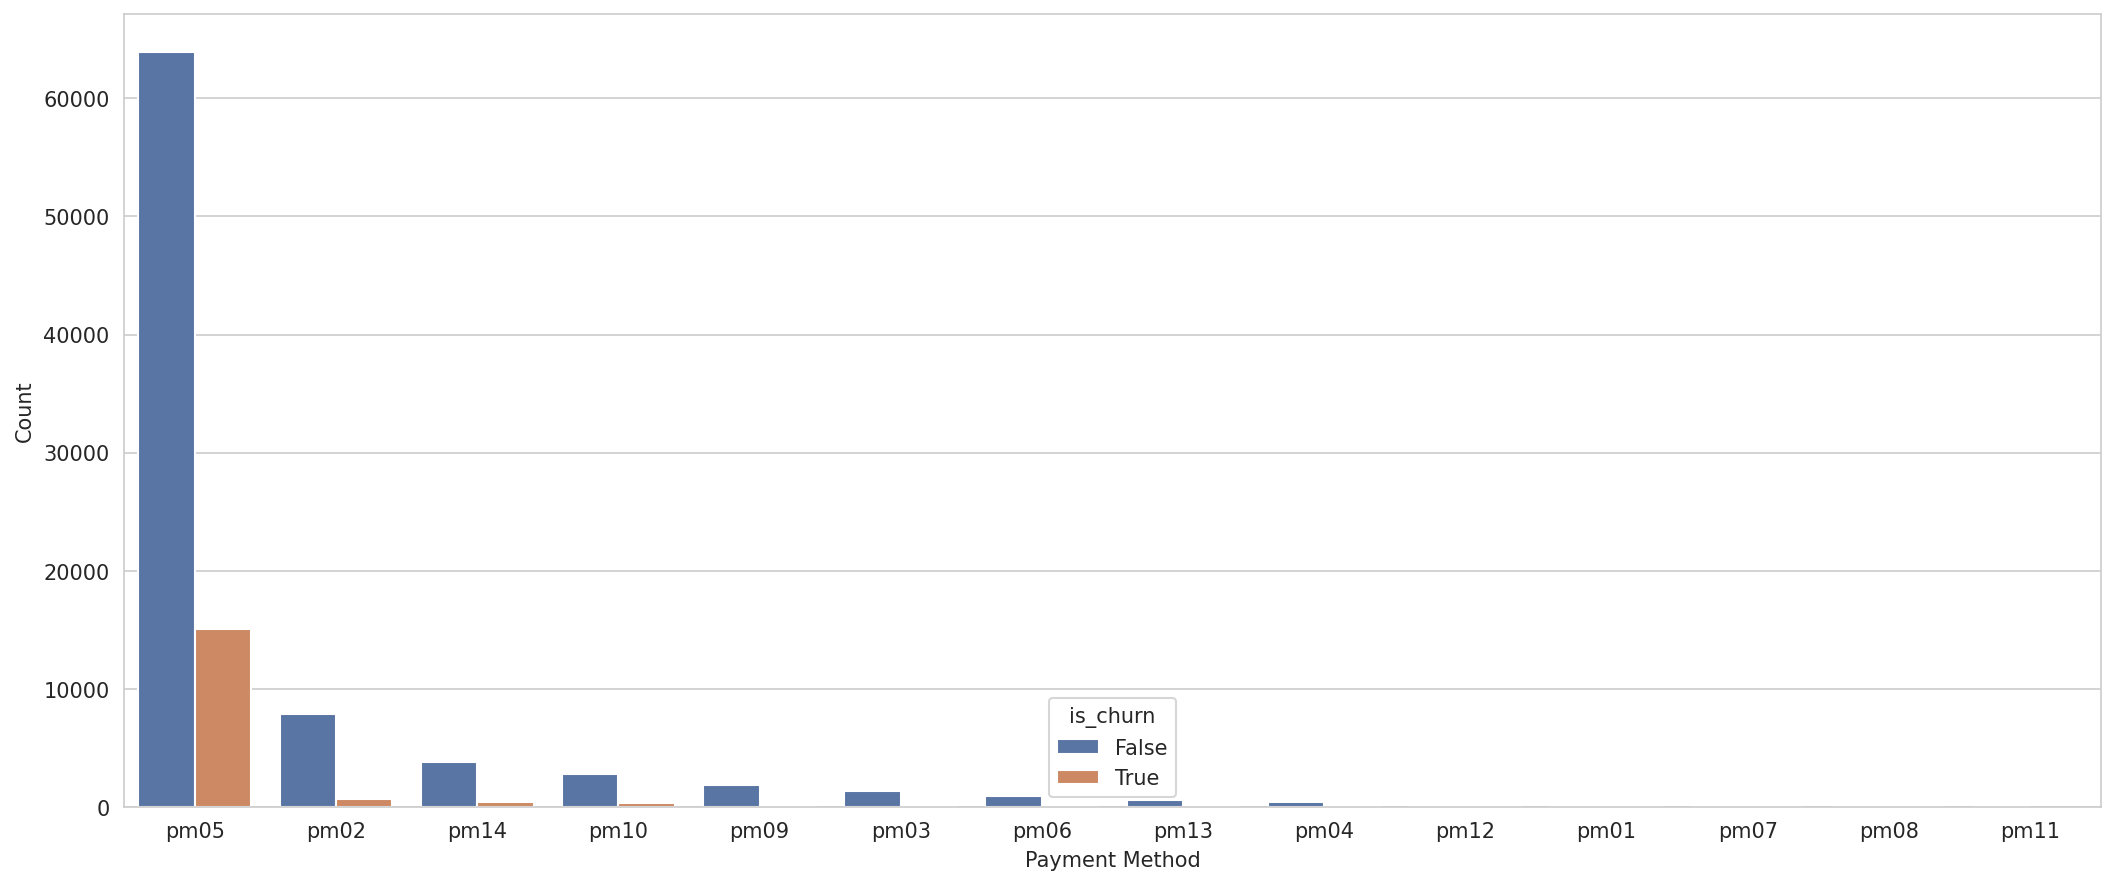

In [16]:
df = or_pr_cl_df[["payment_method", "is_churn"]].value_counts().reset_index()

fig, ax = plt.subplots(figsize=fig_dim)

_ = sns.barplot(x="payment_method", y=0, data=df, hue="is_churn")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()

 - Tem muitos mais casos de churn com quem utiliza o pm05 do que com os outros métodos de pagamento.

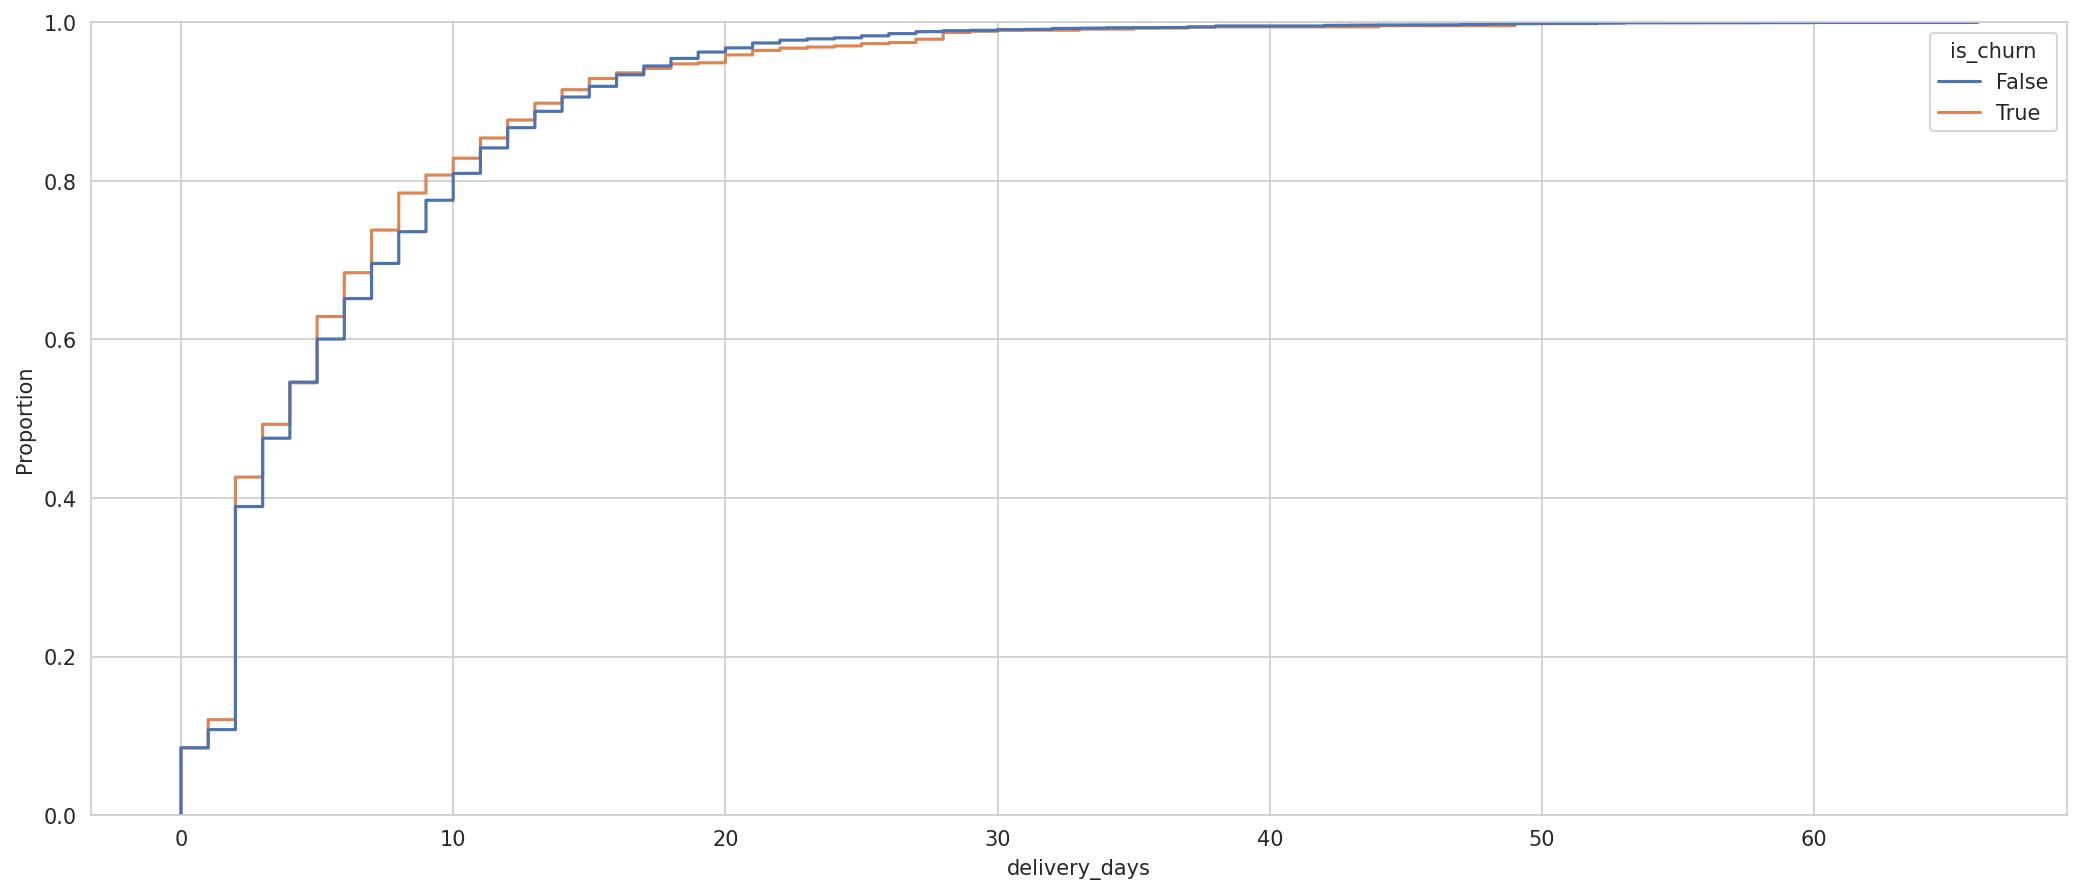

In [17]:
df = or_pr_cl_df[["delivery_days", "is_churn"]].value_counts().reset_index()

fig, ax = plt.subplots(figsize=fig_dim)

_ = sns.ecdfplot(x="delivery_days", data=or_pr_cl_df[or_pr_cl_df["payment_method"] == "pm02"], hue="is_churn")
plt.show()

 - delivery_days não separa muito bem as distribuições de churn, muita sobreposição

/home/luba/.local/share/virtualenvs/TeraFourthChallenge-XyNAZkZS/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


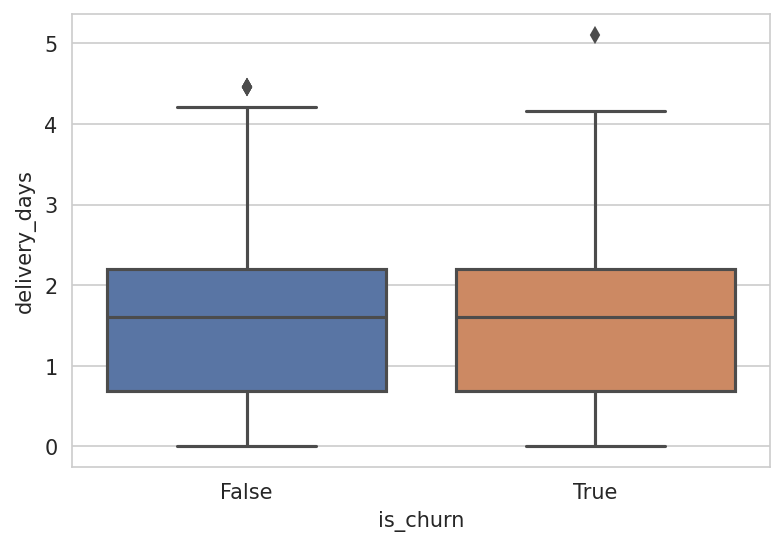

In [18]:
_ = sns.boxplot(y=np.log(or_pr_cl_df["delivery_days"]), x="is_churn", data=or_pr_cl_df)
plt.show()

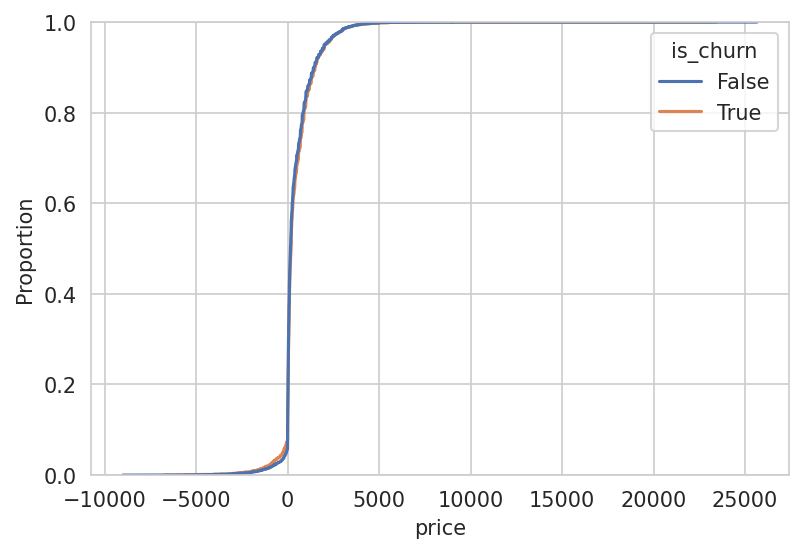

In [19]:
_ = sns.ecdfplot(x="price", data=or_pr_cl_df, hue="is_churn")
plt.show()

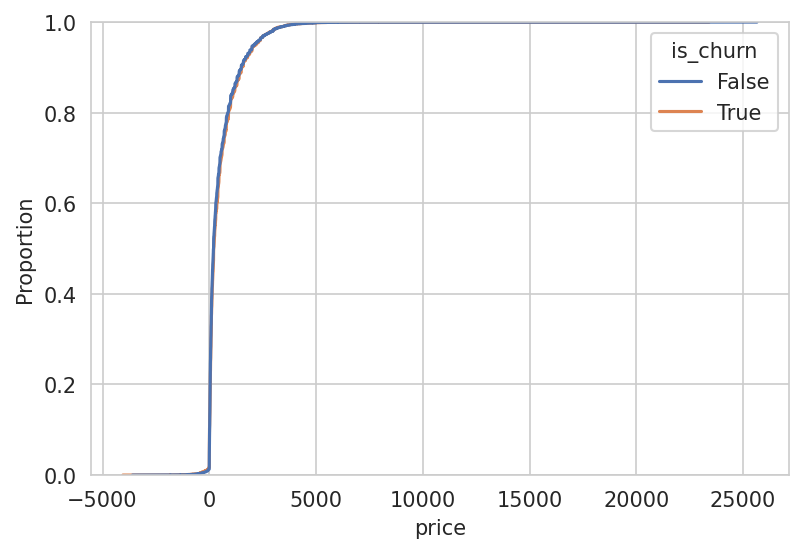

In [20]:
# lets see the mean price by order_id
df = or_pr_cl_df.groupby(["order_id", "is_churn"])["price"].agg("mean").reset_index()

_ = sns.ecdfplot(x="price", data=df, hue="is_churn")
plt.show()

Me parece que a variável de preço tem pouquíssima importância na identificação de churn.

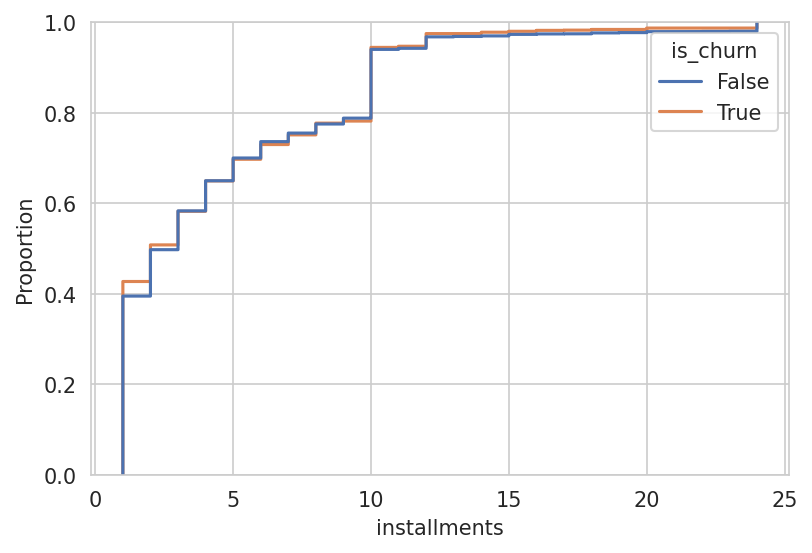

In [21]:
_ = sns.ecdfplot(x="installments", data=or_pr_cl_df, hue="is_churn")
plt.show()

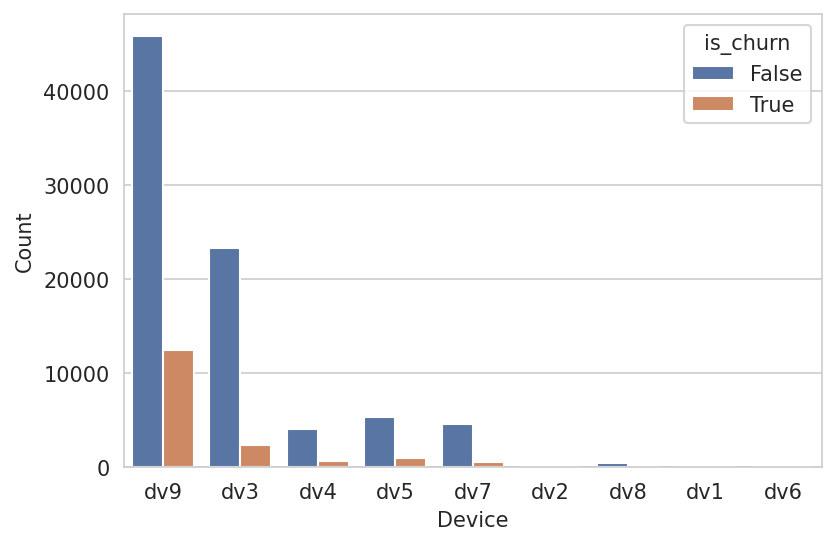

In [47]:
_ = sns.countplot(x="device", data=or_pr_cl_df, hue="is_churn")
plt.xlabel("Device")
plt.ylabel("Count")
plt.show()

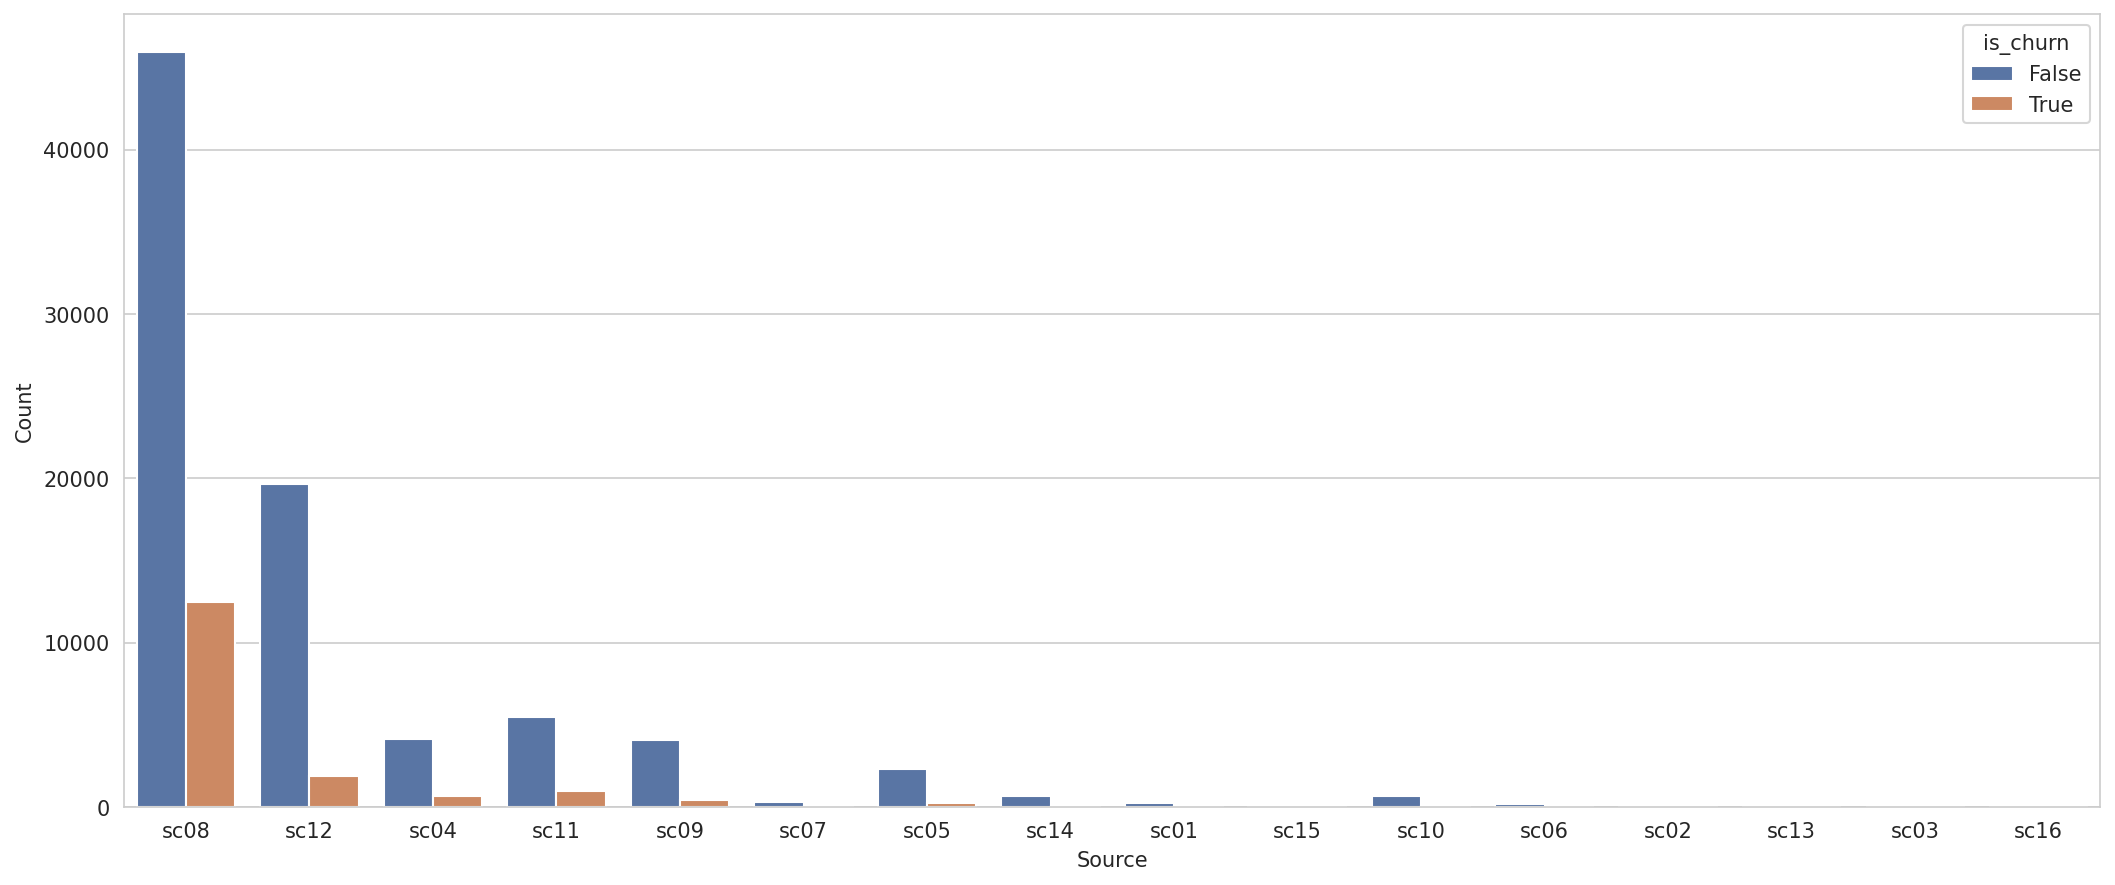

In [46]:
fig, ax = plt.subplots(figsize=fig_dim)

_ = sns.countplot(x="source", data=or_pr_cl_df, hue="is_churn", ax=ax)
plt.xlabel("Source")
plt.ylabel("Count")
plt.show()

 - alguns source e device tem alta taxa de churn

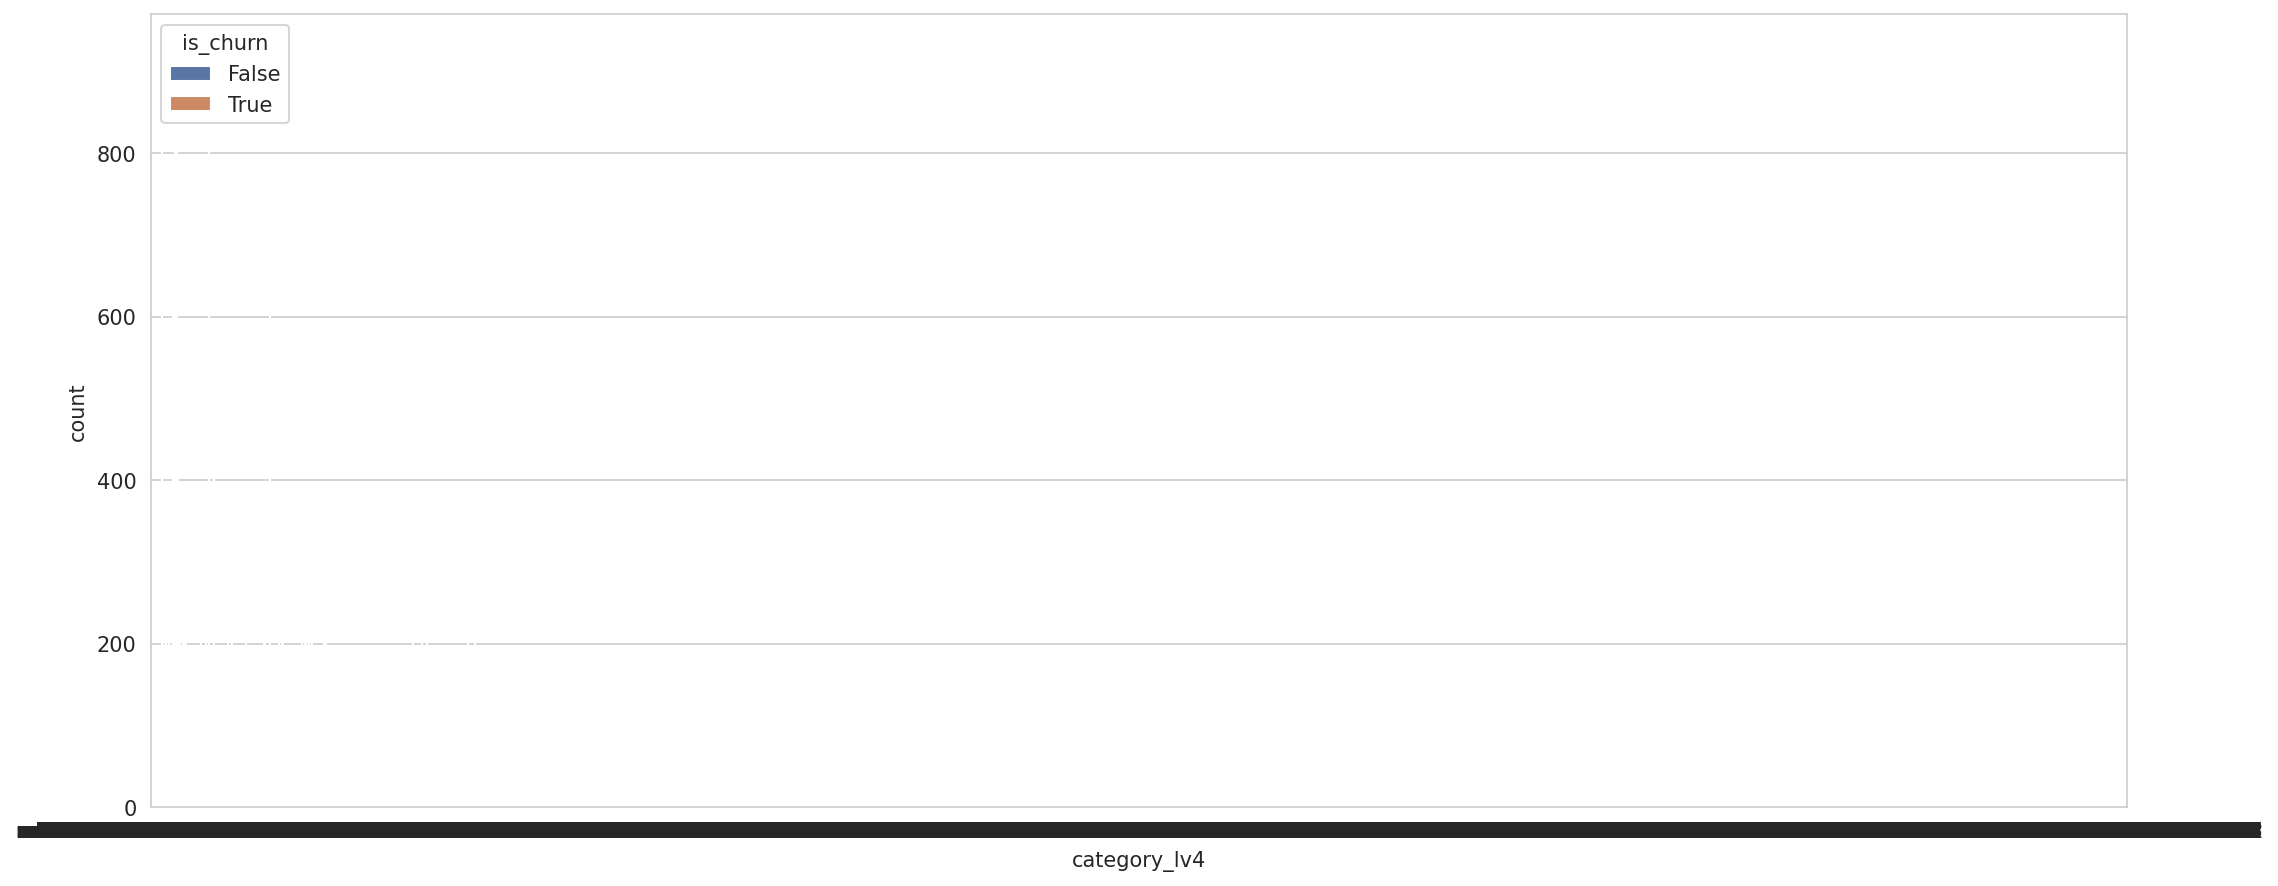

In [24]:
fig, ax = plt.subplots(figsize=fig_dim)

_ = sns.countplot(x="category_lv4", data=or_pr_cl_df, hue="is_churn")
plt.show()

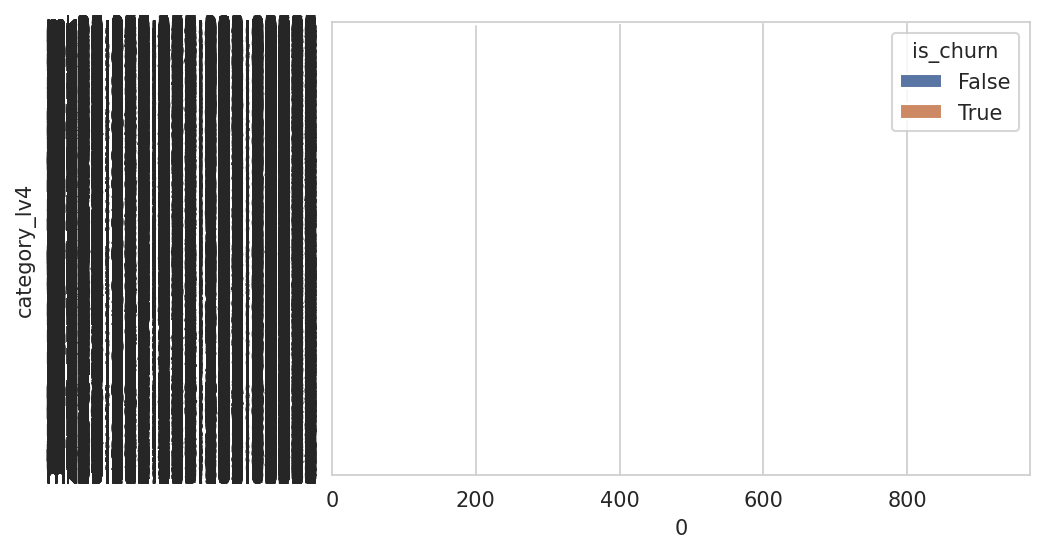

In [25]:
df = or_pr_cl_df[["category_lv4", "is_churn"]].value_counts().reset_index()

_ = sns.barplot(x=0, y="category_lv4", data=df, hue="is_churn")

- Categorias de produtos podem ser criadas a todo momento. Precisaríamos encodar categorias com base na sua frequência (um top10) e outra categoria em outros.

In [26]:
or_pr_cl_df[["category_lv4"]].value_counts()

category_lv4          
mk21:127:505:103:00668    1133
mk21:127:512:103:04919    1128
mk22:100:277:103:04947    1093
mk21:127:072:103:09604    1089
mk21:089:468:103:05914     911
                          ... 
mk25:130:103:103:00572       1
mk25:130:103:103:00989       1
mk25:130:103:103:01824       1
mk25:130:103:103:02354       1
mk04:187:103:103:04114       1
Length: 8674, dtype: int64

In [27]:
products = pd.read_csv("../data/product.csv")
products.isnull().sum()

product_id      0
category_lv0    0
category_lv1    0
category_lv2    0
category_lv3    0
category_lv4    0
dtype: int64

- Categories vamos adicionar somente ao final.

In [28]:
or_pr_cl_df.columns

Index(['order_id', 'client_id', 'product_id', 'datetime', 'units', 'price',
       'payment_method', 'installments', 'delivery_days', 'delivery_state',
       'device', 'source', 'category_lv0', 'category_lv1', 'category_lv2',
       'category_lv3', 'category_lv4', 'is_churn', 'order_year', 'order_month',
       'order_day'],
      dtype='object')

In [29]:
or_pr_cl_df[or_pr_cl_df["units"] < 1]["is_churn"].value_counts(normalize=True)

False    0.793678
True     0.206322
Name: is_churn, dtype: float64

- abaixo de 6 unidade temos maior ocorrência de churn, acima essa quantidade diminio

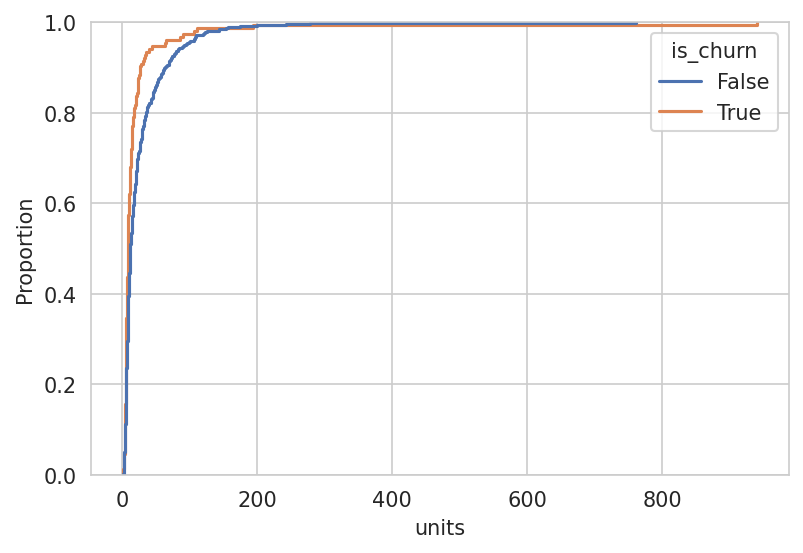

In [30]:
df = or_pr_cl_df.groupby(["client_id", "is_churn"])["units"].agg(sum).reset_index()
df2 = df[["units", "is_churn"]].value_counts().reset_index()

_ = sns.ecdfplot(x="units", data=df2, hue="is_churn")

- quem compra menos unidades tem menor ocorrência a churn

## Verificar a relação entre o state do client, e o state de entrega do produto

- Iremos realizar também um balanceamento nos dados em uma das etapas.

In [31]:
or_pr_cl_w_state_ori = or_pr_cl_df.merge(
    right=client_tr[["client_id", "state"]],
    on="client_id",
    how="left"
)

In [32]:
df = or_pr_cl_w_state_ori[["order_id", "client_id", "delivery_state", "state", "is_churn"]].copy()

different_state = []
for index, row in df.iterrows():
    delivery_state = row["delivery_state"]
    state = row["state"]

    if delivery_state == state:
        different_state.append(1)
    else:
        different_state.append(0)

df["is_the_same_state"] = different_state

In [33]:
df_2 = df.groupby(["is_churn"])["is_the_same_state"].agg("sum").reset_index()
df_2.columns = ["is_churn", "qtt_same_state"]

In [34]:
df_2

,is_churn,qtt_same_state
0,False,36203
1,True,4400


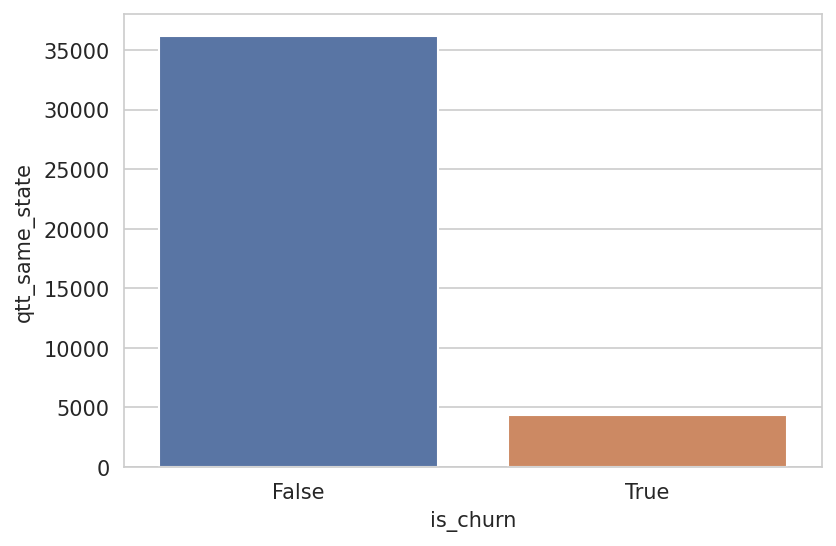

In [35]:
_ = sns.barplot(x="is_churn", y="qtt_same_state", data=df_2)
plt.show()

O que vemos aqui é que temos mais compras para o mesmo estado, do que para Estados diferentes. E acabamos observando menor ocorrência de churn dentre as pessoas que compram no mesmo estado. Porém, acho q é interessante investigar esses valores padronizados pela quantidade de churn.

In [36]:
df_2.loc[df_2["is_churn"], "qtt_same_state"] = df_2[df_2["is_churn"]]["qtt_same_state"]/4207

In [37]:
df_2.loc[~df_2["is_churn"], "qtt_same_state"] = df_2[~df_2["is_churn"]]["qtt_same_state"]/19085

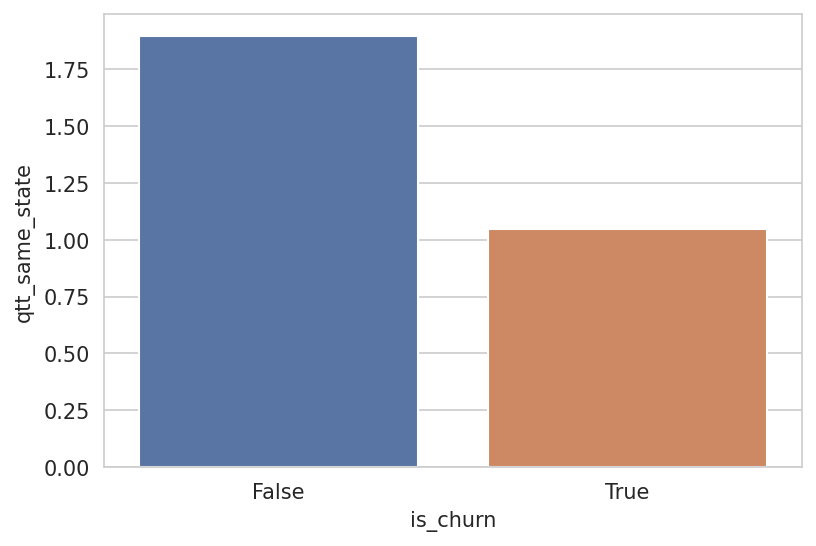

In [38]:
_ = sns.barplot(x="is_churn", y="qtt_same_state", data=df_2)
plt.show()

Vamos encodar a influência do Estado como uma variável numérica que conta quantas vezes o client_id comprou para entregar para o mesmo Estado.

In [39]:
or_pr_cl_w_state_ori

,order_id,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,...,category_lv0,category_lv1,category_lv2,category_lv3,category_lv4,is_churn,order_year,order_month,order_day,state
0,ox008433,cx05072,px04611,2019-10-07 15:20:00,1.0,49.90,pm05,NaN,NaN,st07,...,mk04,mk04:128,mk04:128:103,mk04:128:103:103,mk04:128:103:103:03294,False,2019,10,7,st25
1,ox070389,cx05072,px12305,2019-10-11 17:42:00,1.0,69.90,pm05,NaN,NaN,st07,...,mk04,mk04:292,mk04:292:246,mk04:292:246:103,mk04:292:246:103:04338,False,2019,10,11,st25
2,ox090390,cx03836,px11147,2019-02-08 11:37:00,1.0,54.92,pm05,NaN,NaN,st07,...,mk29,mk29:039,mk29:039:103,mk29:039:103:103,mk29:039:103:103:06602,False,2019,2,8,st15
3,ox090390,cx03836,px11147,2019-02-08 17:29:00,1.0,-54.92,pm05,NaN,NaN,st07,...,mk29,mk29:039,mk29:039:103,mk29:039:103:103,mk29:039:103:103:06602,False,2019,2,8,st15
4,ox106743,cx03836,px05603,2019-02-08 11:37:00,1.0,229.90,pm05,NaN,NaN,st07,...,mk29,mk29:171,mk29:171:103,mk29:171:103:103,mk29:171:103:103:03316,False,2019,2,8,st15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101000,ox097403,cx00861,px03381,2019-07-27 14:16:00,1.0,793.98,pm05,NaN,NaN,st07,...,mk21,mk21:089,mk21:089:468,mk21:089:468:103,mk21:089:468:103:03641,False,2019,7,27,st21
101001,ox072312,cx00861,px10549,2019-07-27 14:16:00,1.0,5.04,pm05,NaN,NaN,st07,...,mk21,mk21:127,mk21:127:072,mk21:127:072:103,mk21:127:072:103:09604,False,2019,7,27,st21
101002,ox056176,cx00861,px11425,2019-07-27 14:16:00,1.0,99.00,pm05,NaN,NaN,st07,...,mk17,mk17:139,mk17:139:138,mk17:139:138:075,mk17:139:138:075:10110,False,2019,7,27,st21
101003,ox017842,cx00861,px03347,2019-07-29 13:56:00,1.0,5.10,pm05,NaN,NaN,st07,...,mk21,mk21:127,mk21:127:505,mk21:127:505:103,mk21:127:505:103:00668,False,2019,7,29,st21


# Resumo de Próximas Etapas de Feature Engineering:



In [40]:
to_test = {"ob1": 10, "ob2": 12, "ob4": 33}
# iterating over a dict
for key, values in to_test.items():
    print(key)
    print(values)

ob1
10
ob2
12
ob4
33


In [41]:
df_to_test = pd.DataFrame(columns=["ob1", "ob2", "ob4"])
df_to_test

,ob1,ob2,ob4


In [42]:
pd.concat([to_test, pd.DataFrame(to_test)])

ValueError: If using all scalar values, you must pass an index

In [ ]:
to_test_2 = {"ob1": 3, "ob2": 4}

In [ ]:
df_to_test.append(to_test_2, ignore_index=True)

In [ ]:
df_to_test

In [ ]:
df = or_pr_cl_w_state_ori.groupby(["client_id", "payment_method"])["payment_method"].agg([np.size]).reset_index()
df_user = df[df["client_id"] == 'cx00002']
df_user.index = df_user["payment_method"]
df_user[["payment_method", "size"]]

In [ ]:
import pandas as pd

In [ ]:
payments = ["pm1", "pm1", "pm3"]
clients = ["client_1", "client_1", "client_2"]
df = pd.DataFrame({"clients": clients, "payments": payments})
pm_type = pd.CategoricalDtype(categories=["pm1", "pm2", "pm3", "pm4"])
df["payments"] = df["payments"].astype(pm_type)
df.dtypes

In [ ]:
df = pd.crosstab(df["clients"], df["payments"], dropna=False).reset_index()

In [ ]:
df[df["clients"] == "client_1"]

In [ ]:
df

In [ ]:
client_tr